In [22]:
!pip install imbalanced-learn

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Part A

In [24]:
df = pd.read_csv("healthcare_dataset_stroke_data_assignment2_section2.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       5110 non-null   int64  
 5   heart_disease      5110 non-null   int64  
 6   ever_married       5110 non-null   object 
 7   work_type          4852 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     4863 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 519.1+ KB


* Checking for missing data 

In [26]:
df.head(5)

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,2554.500000,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,1475.274268,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1277.250000,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,2554.500000,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,3831.750000,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,5109.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [28]:
df.isnull().sum()

Unnamed: 0             0
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type            258
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       247
stroke                 0
dtype: int64

* Checking the dataset for the sum of missing data in repective columns

In [29]:
#df.dropna(inplace=True)
#df.info() 

In [30]:
#impude missing values
#df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [31]:
#df.bmi

* Original thought process was to drop the rows with missing data 

In [32]:
#fill missing values with mode
#df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)
#df.fillna({'bmi': df['bmi'].mode()[0]}, inplace=True)
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())



#convert categorical data to numerical
df = pd.get_dummies(df, drop_first=True)

#Normalize numerical features using StandardScaler
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])
df.head(5)

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,work_type_govt job,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_formerly_smoked,smoking_status_never smoked,smoking_status_smokes
0,0,9046,1.051434,0,1,2.706375,1.001234e+00,1,True,False,...,False,True,False,False,False,True,True,False,False,False
1,1,51676,0.786070,0,0,2.121559,4.615554e-16,1,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2,31112,1.626390,0,1,-0.005028,4.685773e-01,1,True,False,...,False,True,False,False,False,False,False,False,True,False
3,3,60182,0.255342,0,0,1.437358,7.154182e-01,1,False,False,...,False,True,False,False,False,True,False,False,False,True
4,4,1665,1.582163,1,0,1.501184,-6.357112e-01,1,False,False,...,False,False,True,False,False,False,False,False,True,False


* Fill the missing data with the mean of the cumulative data

* Handling missing values, converting the variables and normailzed numerical features.

In [33]:
df.isnull().sum()

Unnamed: 0                        0
id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
gender_Other                      0
gender_female                     0
gender_m                          0
ever_married_Yes                  0
ever_married_no                   0
ever_married_yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
work_type_govt job                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_formerly_smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [34]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)

In [35]:
df_pca = pd.DataFrame(df_pca)
df_pca.head(5), df_pca.shape


(              0
 0  27474.465607
 1 -15155.512473
 2   5408.475414
 3 -23661.509969
 4  34855.457482,
 (5110, 1))

* Shaping the data and using pca to classify the data


# Binary Classification

In [36]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Split the Dataset: Divide the dataset into features (X) and the target variable (y). Then, split the data into training and testing sets.

In [37]:
X, y

(      Unnamed: 0     id       age  hypertension  heart_disease  \
 0              0   9046  1.051434             0              1   
 1              1  51676  0.786070             0              0   
 2              2  31112  1.626390             0              1   
 3              3  60182  0.255342             0              0   
 4              4   1665  1.582163             1              0   
 ...          ...    ...       ...           ...            ...   
 5105        5105  18234  1.626390             1              0   
 5106        5106  44873  1.670617             0              0   
 5107        5107  19723 -0.363842             0              0   
 5108        5108  37544  0.343796             0              0   
 5109        5109  44679  0.034205             0              0   
 
       avg_glucose_level           bmi  gender_Male  gender_Other  \
 0              2.706375  1.001234e+00         True         False   
 1              2.121559  4.615554e-16        False     

# Trainig and Evaluation of the model 


In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest accuracy: ", accuracy_score(y_test, y_pred_rf))


Random Forest accuracy:  0.9990215264187867


* This is an extremely high accuracy score, indicating that the model is very good at correctly classifying instances.

In [39]:
print("Random Forest F1 Score: ", f1_score(y_test, y_pred_rf))

Random Forest F1 Score:  0.991869918699187


* The F1 score is a balance between precision and recall, and a high F1 score indicates that the model is performing well in both aspects.

In [40]:
print("Random Forest Precision: ", precision_score(y_test, y_pred_rf))

Random Forest Precision:  1.0


* Precision is the ratio of correctly predicted positive observations to the total predicted positives. A precision of 1.0 means that every positive prediction made by the model is correct.

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      0.98      0.99        62

    accuracy                           1.00      1022
   macro avg       1.00      0.99      1.00      1022
weighted avg       1.00      1.00      1.00      1022



* Class 0 (No Stroke): The model has perfect precision, recall, and F1 score, indicating that it correctly identifies all instances of the negative class without any false positives or false negatives.

* Class 1 (Stroke): The model has a slightly lower precision and recall but still very high values, indicating that it is very good at identifying the positive class. The recall is slightly lower than precision, suggesting that the model might be missing some instances of the positive class.

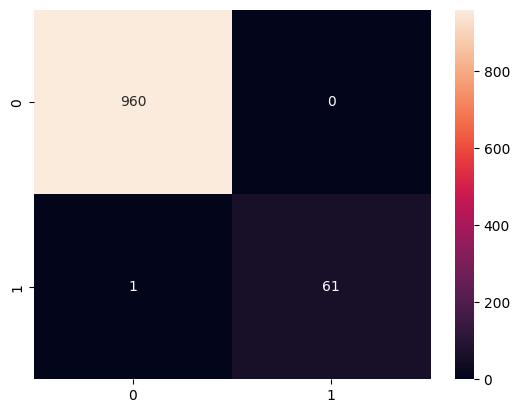

In [42]:
plot = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='g')

* The confusion matrix shows that the model correctly classified 960 instances of the negative class and 61 instances of the positive class, with only 1 false positive (a patient without a stroke incorrectly identified as having a stroke).

# KNN

In [43]:
cv_score = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_score.append(scores.mean())

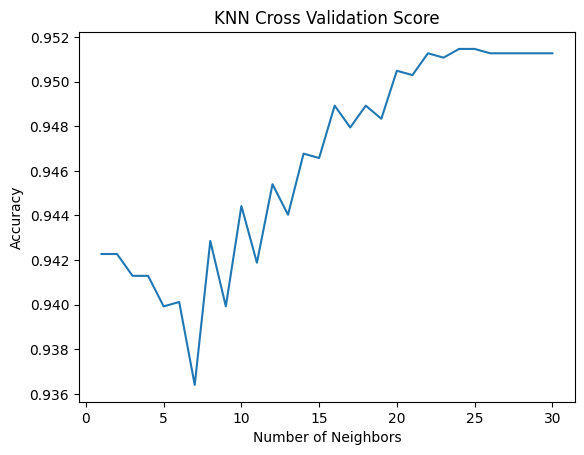

In [44]:
plt.plot(range(1, 31), cv_score)
plt.title('KNN Cross Validation Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [45]:
optimal_k = cv_score.index(max(cv_score)) + 1

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN accuracy: ", accuracy_score(y_test, y_pred_knn))

KNN accuracy:  0.9393346379647749


* This indicates that the Random Forest model is very accurate in its predictions, with almost all instances being correctly classified.

In [46]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [47]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

print("Random Forest Classification Report:", classification_report(y_test, y_pred_rf))
print("KNN Classification Report:", classification_report(y_test, y_pred_knn))

print("Random Forest Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print("KNN Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))

Random Forest Accuracy: 0.9990215264187867
KNN Accuracy: 0.9393346379647749
Random Forest Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      0.98      0.99        62

    accuracy                           1.00      1022
   macro avg       1.00      0.99      1.00      1022
weighted avg       1.00      1.00      1.00      1022

KNN Classification Report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Random Forest Confusion Matrix: [[960   0]
 [  1  61]]
KNN Confusion Matrix: [[960   0]
 [ 62   0]]


c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jmitc\anaconda3\envs\Assignment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

* Performance Difference: The Random Forest model significantly outperforms the KNN model in terms of accuracy, precision, recall, and F1 score. This suggests that the Random Forest model is more effective at classifying instances in this dataset.

* Class Imbalance: The KNN model's performance metrics for the positive class (stroke) are perfect, indicating that it is very good at identifying instances of the positive class. However, the negative class (no stroke) has a precision of 0.94, which is slightly lower than the perfect score for the positive class. This could suggest a class imbalance in the dataset, where the positive class is significantly more common than the negative class.

* Model Choice: Given the high accuracy and performance metrics of the Random Forest model, it would be the preferred choice for this dataset. The KNN model's performance is still high, but the Random Forest model's superior performance suggests it is more effective for this specific task.

# Recommendations for improvement
* Hyperparameter Tuning for KNN: The KNN model's poor performance suggests that the number of neighbors used might not be optimal. Consider using techniques like grid search or random search to find the best value for the number of neighbors. This can improve the model's ability to generalize and reduce overfitting.

* Model Comparison and Ensembling: Since the Random Forest model performs significantly better than the KNN model, consider using ensemble methods to combine the predictions of both models. This can help improve the overall performance and robustness of the predictions.

* Addressing Class Imbalance: If the dataset is imbalanced, consider using techniques like oversampling the minority class, undersampling the majority class, or using class weights to give more importance to the minority class during training. This can help improve the model's performance on the minority class.



# Part C

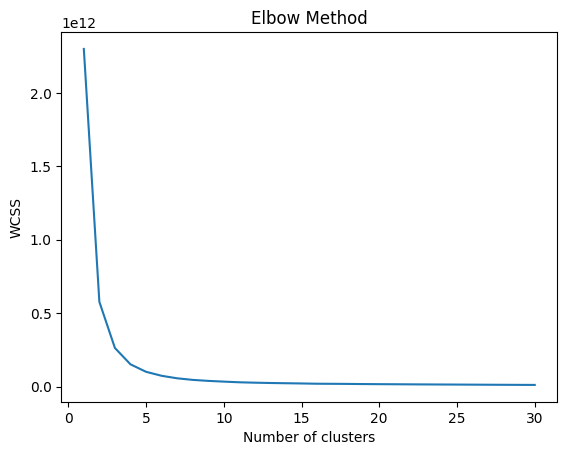

In [48]:
wc = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wc.append(kmeans.inertia_)
plt.plot(range(1, 31), wc)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* Use the Elbow Method to find the optimal number of clusters. This method involves plotting the sum of squared distances (inertia) for different values of k and looking for an "elbow" point where the rate of decrease sharply shifts.


In [49]:
kmeans = KMeans(n_clusters = optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_ykmean = kmeans.fit_predict(X) 
pred_ykmean

array([ 9, 10,  3, ...,  6,  7,  1])

In [51]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 187
Before OverSampling, counts of label '0': 3901 

After OverSampling, the shape of train_X: (7802, 24)
After OverSampling, the shape of train_y: (7802,) 

After OverSampling, counts of label '1': 3901
After OverSampling, counts of label '0': 3901


C:\Users\jmitc\AppData\Local\Temp\ipykernel_20244\3967326550.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


In [54]:
lf_smot = LogisticRegression(max_iter=1000, random_state=42, solver='saga')
lf_smot.fit(X_train_res, y_train_res)
ypred_smot = lf_smot.predict(X_test)
confusion_matrix(y_test, ypred_smot)

array([[908,  52],
       [  9,  53]], dtype=int64)